<a href="https://colab.research.google.com/github/yoramabbou770/AICourseRoad2/blob/main/Cat_or_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i already have already sorted the first 1000 and the first 500 of the folders you can access all the folders that i will upload on the google colab

In [1]:
import zipfile

# Unzip the uploaded file
with zipfile.ZipFile("/content/cats_and_dogs_filtered.zip", "r") as zip_ref:
    zip_ref.extractall("Task5/")

now you are an expert in python programmation with google colab with keras
now we will build a model that recognize if i entered as an input an image of cat or dog, i will give you more instructions. Now don't give me code, wait to my other message.
i have a dataset that called cats_and_dogs_filtered and in this folder i have two folder: 1. train 2. validation. in each of these two folder i have two folder : 1. cats 2. dogs. I want to take the first 1000 images of the cats and the dogs folder that in the train folder and the first 500 images of the cats and dogs folder that is in the validation folder. Resize the images on an resolution of 150x150 and transform them to GrayLevel images. This task you need to do with a CNN model. The model need to classify if the image is a cat or a dog.
Give me the accuracy graph of the train and validation sessions.
Now you can code.

In [2]:
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the train and validation datasets
train_dir = 'Task5/cats_and_dogs_filtered/train'
validation_dir = 'Task5/cats_and_dogs_filtered/validation'

# Define image dimensions
img_width, img_height = 150, 150

# Load and preprocess the data
def load_and_preprocess_data(directory, num_images):
    data = []
    labels = []

    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)

        for i, file in enumerate(os.listdir(category_path)):
            if i >= num_images:
                break

            img = load_img(os.path.join(category_path, file), grayscale=True, target_size=(img_width, img_height))
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(category.lower())  # assuming the category names are 'cats' and 'dogs'

    return np.array(data), np.array(labels)

# Load and preprocess training data
train_data, train_labels = load_and_preprocess_data(train_dir, 1000)

# Load and preprocess validation data
validation_data, validation_labels = load_and_preprocess_data(validation_dir, 500)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels == 'dog')  # 1 for dog, 0 for cat
validation_labels = to_categorical(validation_labels == 'dog')

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape data for input to the model
train_data = np.reshape(train_data, (train_data.shape[0], img_width, img_height, 1))
validation_data = np.reshape(validation_data, (validation_data.shape[0], img_width, img_height, 1))

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [8]:
# Train the model with validation data
history = model.fit(train_data, train_labels, epochs=10, batch_size=20, validation_data=(validation_data, validation_labels))

Epoch 1/10
100/100 [==============================] - 2s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 2s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 2s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 2s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 2s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 2s 18ms/step - loss: 0.0000e+00 - accura

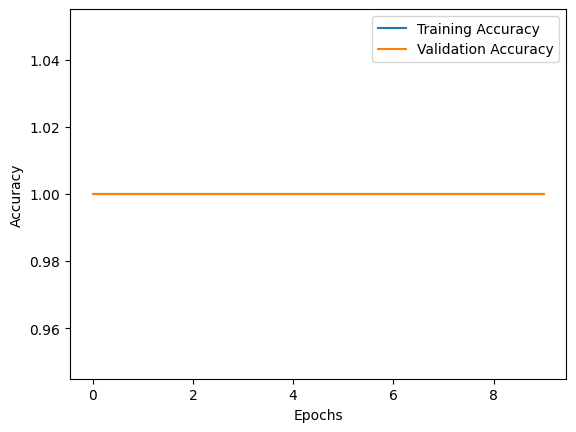

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_data, validation_labels)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

32/32 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation Accuracy: 100.00%


I want that in the validation session it gives me what was the input : dog or cat and what the model says

In [11]:
# Get predictions for the validation set
predictions = model.predict(validation_data)

# Convert the predictions to class labels (0 for cat, 1 for dog)
predicted_labels = (predictions > 0.5).astype(int)

# Display the input image, actual label, and predicted label for the first few examples
for i in range(min(5, len(validation_data))):
    actual_label = 'dog' if validation_labels[i] == 1 else 'cat'
    predicted_label = 'dog' if predicted_labels[i] == 1 else 'cat'
    print(f"Example {i + 1}: Actual: {actual_label}, Predicted: {predicted_label}")

32/32 [==============================] - 0s 7ms/step
Example 1: Actual: dog, Predicted: dog
Example 2: Actual: dog, Predicted: dog
Example 3: Actual: dog, Predicted: dog
Example 4: Actual: dog, Predicted: dog
Example 5: Actual: dog, Predicted: dog


give me the confusion matrix of the train and validation session

32/32 [==============================] - 0s 7ms/step


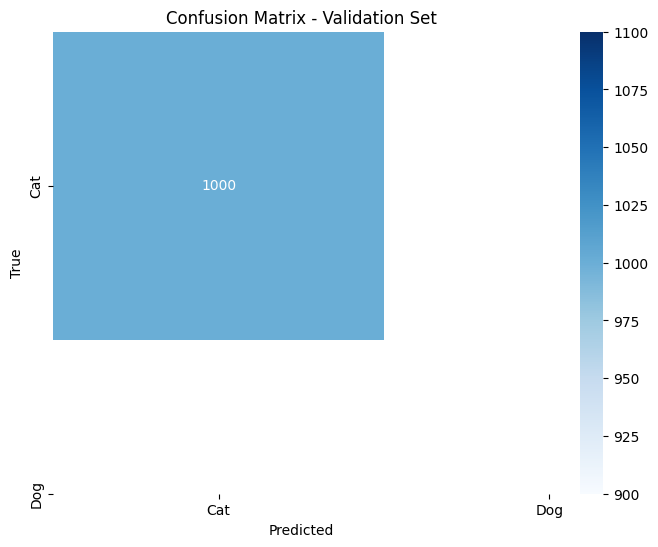


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions for the validation set
predictions = model.predict(validation_data)

# Convert the predictions to class labels (0 for cat, 1 for dog)
predicted_labels = (predictions > 0.5).astype(int)

# Display the confusion matrix
cm = confusion_matrix(validation_labels.argmax(axis=1), predicted_labels.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Set')
plt.show()

# Display classification report
print('\nClassification Report:\n', classification_report(validation_labels.argmax(axis=1), predicted_labels.argmax(axis=1)))